In [48]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree # 의사결정 나무 규칙을 시각화하기 위한 패키지

import math

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings(action='ignore')

In [49]:
# 데이터셋 로드 및 설명 
data = pd.read_csv('UniversalBank.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [50]:
data = data.drop(['ID','ZIP Code'],axis=1)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [52]:
print(f'관측치 수 : {data.shape[0]} \n변수 수 : {data.shape[1]}')

관측치 수 : 5000 
변수 수 : 12


In [53]:
data.rename(columns = {'Personal Loan' : 'PersonalLoan'}, inplace = True)


In [54]:
target = ['PersonalLoan']
print(target)

features = list(set(data.columns) - set(target))
print(features)

['PersonalLoan']
['Securities Account', 'Mortgage', 'Experience', 'Education', 'CCAvg', 'Income', 'CD Account', 'CreditCard', 'Family', 'Online', 'Age']


In [55]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,PersonalLoan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


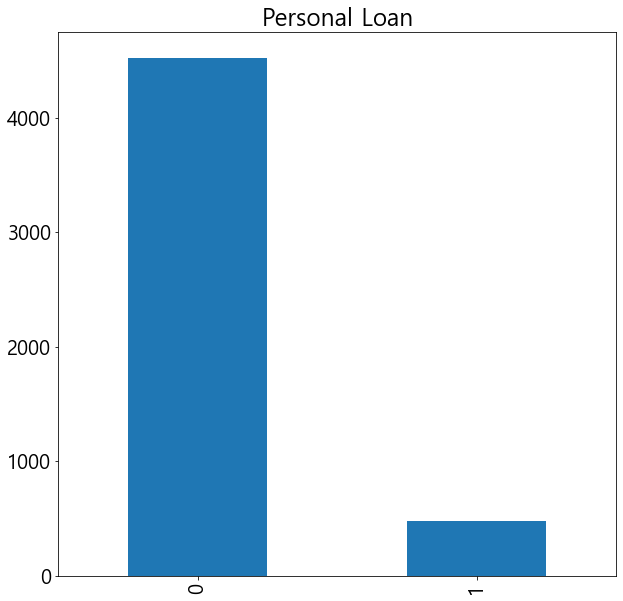

In [56]:
data['PersonalLoan'].value_counts().plot(kind='bar', figsize = (10,10))
plt.title('Personal Loan')
plt.show()

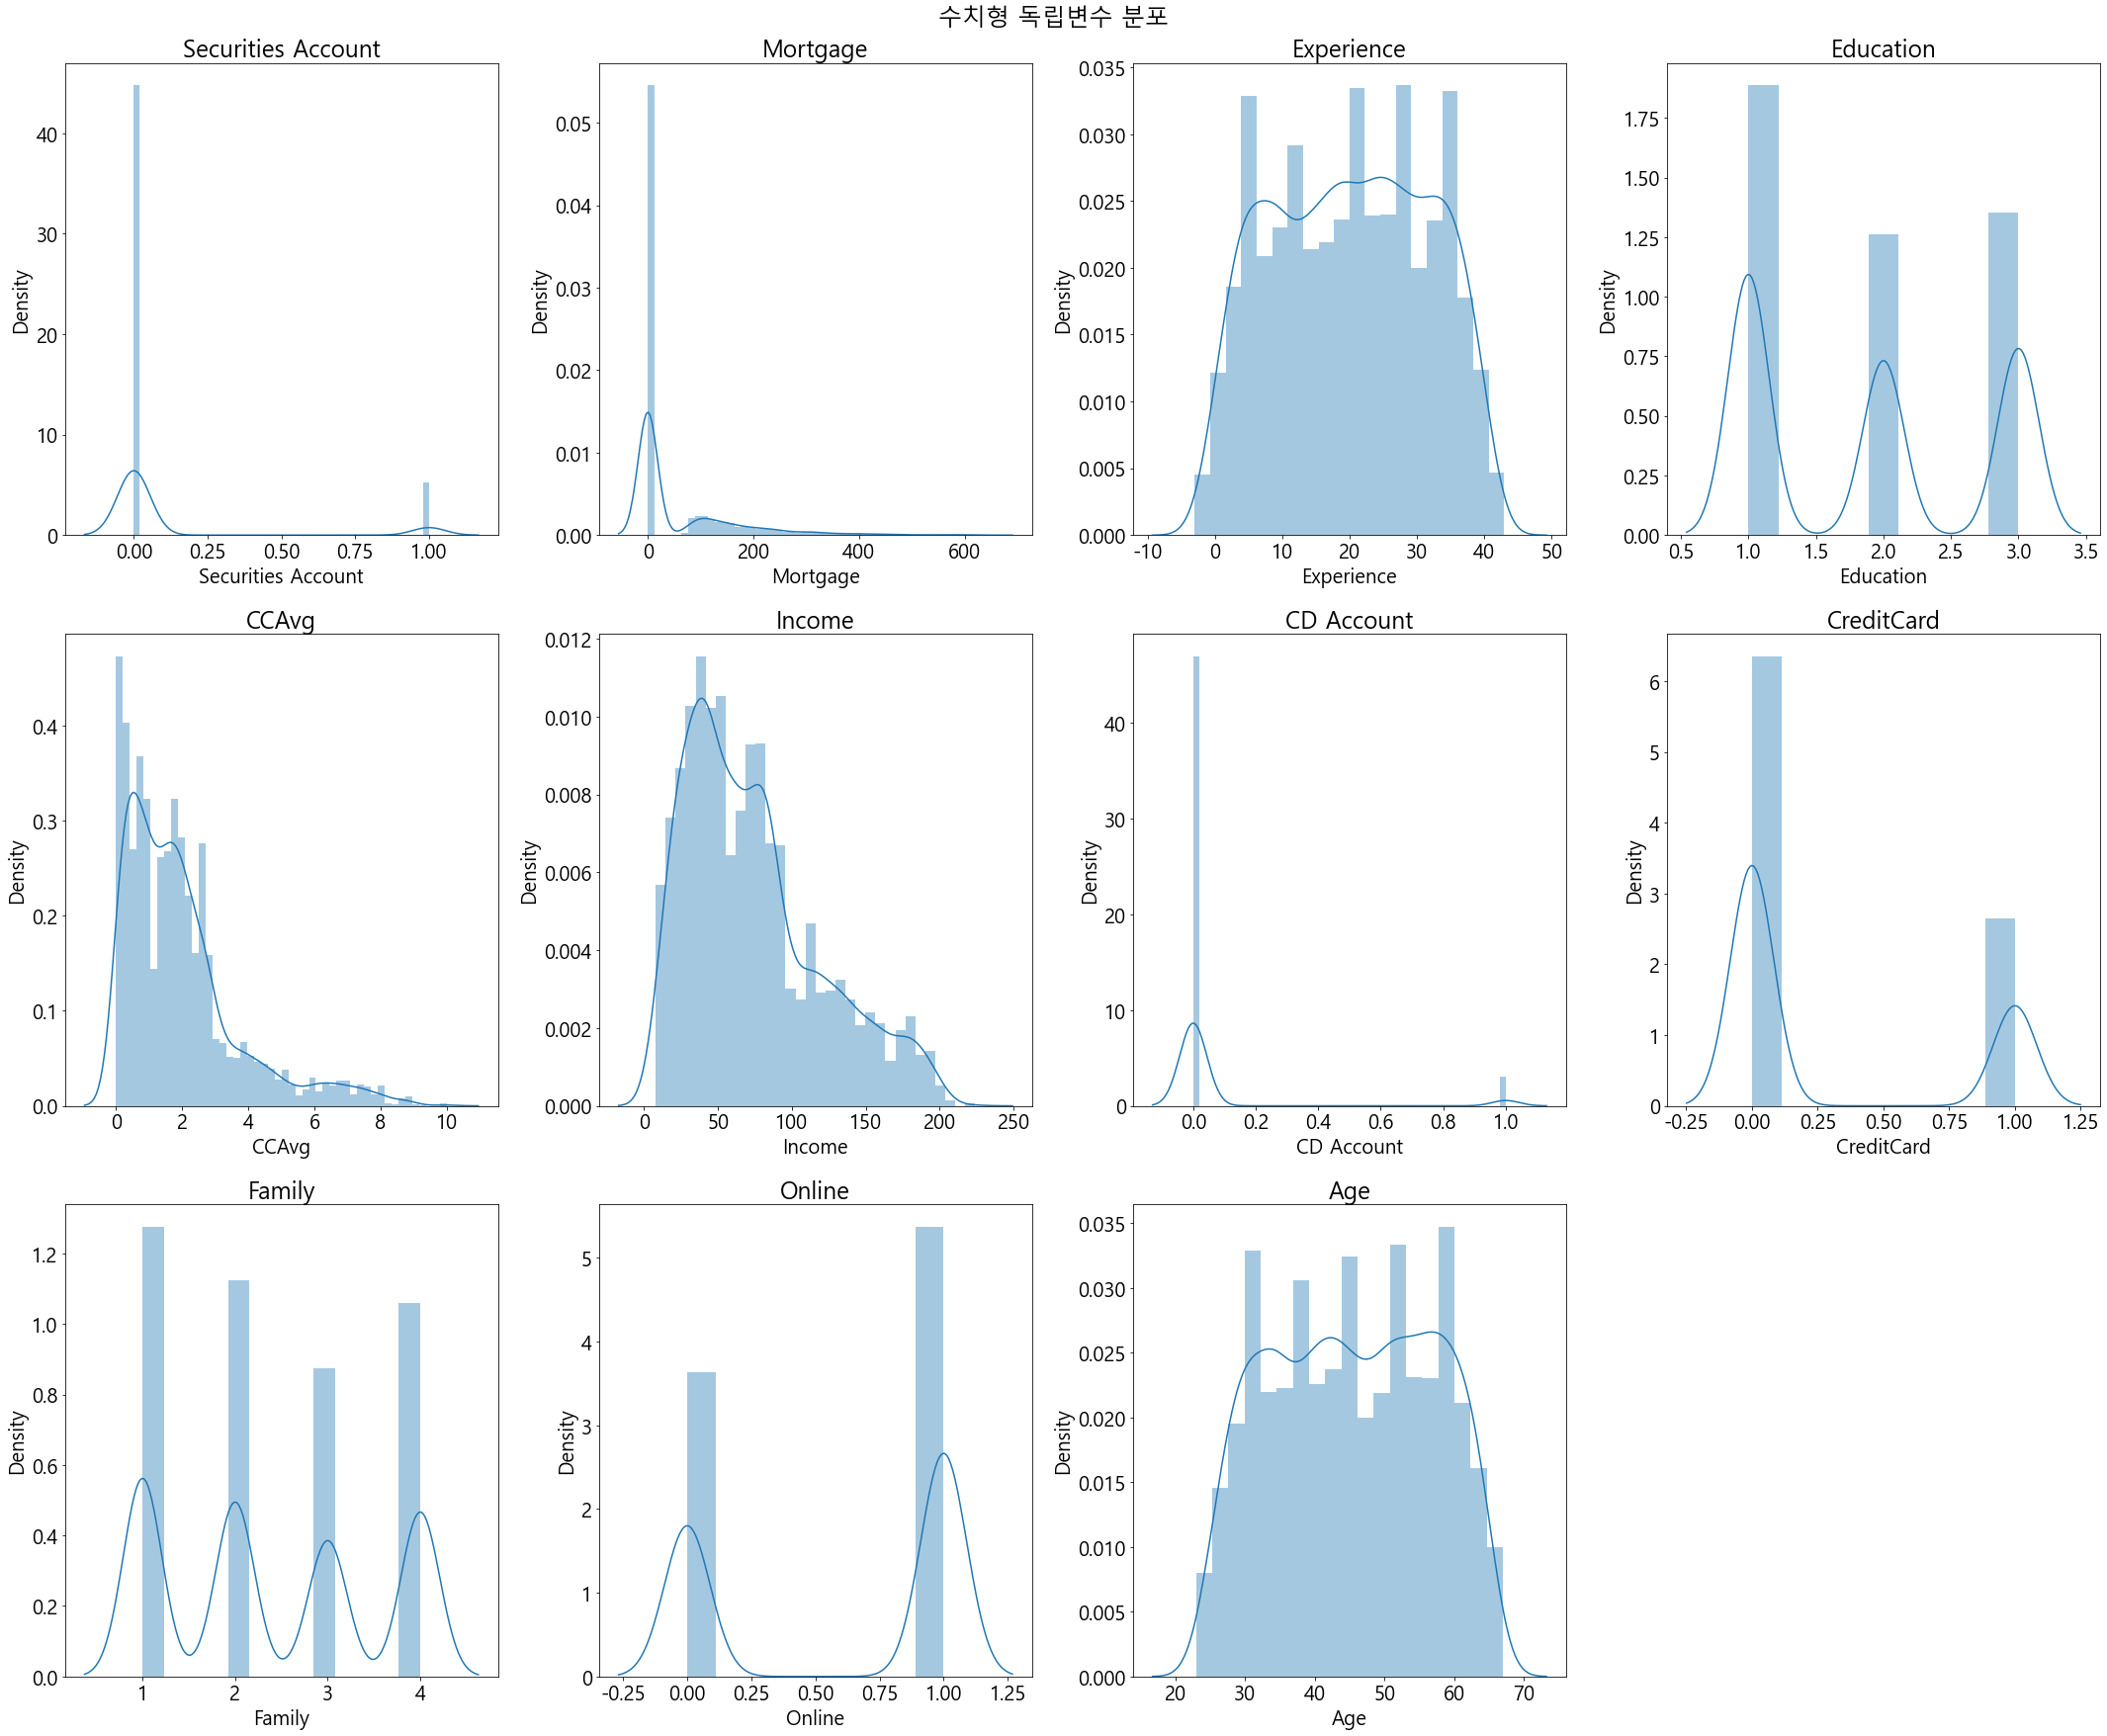

In [57]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)
fig.suptitle('수치형 독립변수 분포')

for i in range(len(features)):
    ax = fig.add_subplot(3,4,i+1)
    ax = sns.distplot(data[features[i]])
    plt.title(features[i])
fig.tight_layout()
plt.show()

<AxesSubplot:>

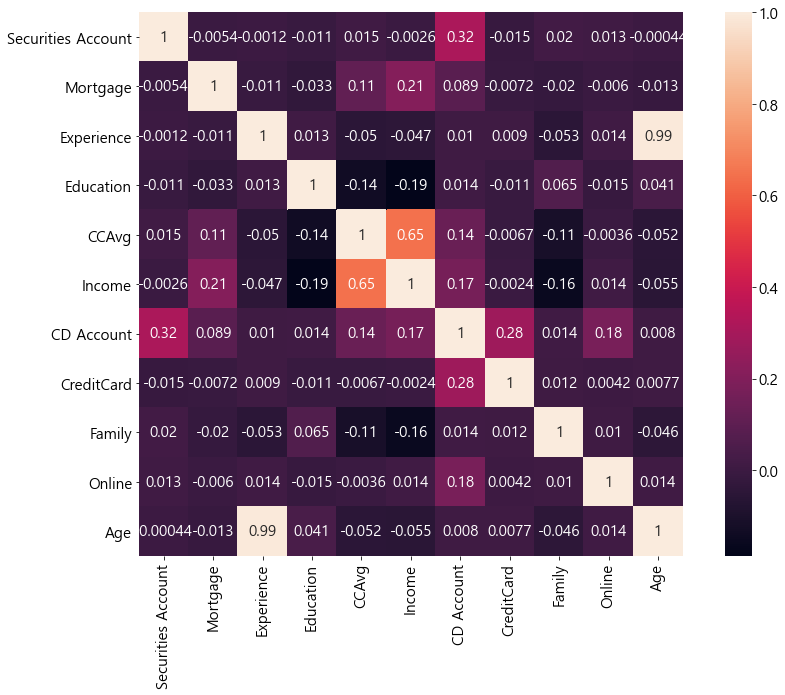

In [74]:
#상관관계분석 피어슨 이용
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
sns.heatmap(data[features].corr(),annot=True,square = True, annot_kws={'size' : 15})


In [59]:
X = data.drop('PersonalLoan', axis=1)
y = pd.DataFrame(data['PersonalLoan'])
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [60]:
y

,PersonalLoan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [61]:
y.value_counts()

PersonalLoan
0               4520
1                480
dtype: int64

In [62]:
# Train set/ Test set 나누기 
''' stratify=y 새로 배운것 y 01 비율유지하며 데이터 스플릿'''
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=42)

# # 데이터 컬럼 단위 정규화 하기
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (3500, 11)
Test set dimension is (1500, 11)


In [63]:
math.sqrt(4)

2.0

In [64]:
max_depths =[]
for i in range(14):
    max_depths.append(i+1)
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, None]

In [65]:
acc_train_list=[]
acc_test_list=[]
recall_train_list=[]
recall_test_list=[]
precision_train_list =[]
precision_test_list =[]
F1_train_list=[]
F1_test_list=[]
BCR_train_list=[]
BCR_test_list=[]

for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth) # 나무 최대 깊이를 제한 가능 : 하이퍼파라미터로 조절 가능 None이면 풀트리
    model.fit(X_train, y_train)
    
    # 예측
    # 1. train, test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    recall_train = recall_score(y_true = y_train, y_pred =y_train_pred)
    recall_test = recall_score(y_true = y_test, y_pred =y_test_pred)
    
    precision_train = precision_score(y_true = y_train, y_pred =y_train_pred)
    precision_test = precision_score(y_true = y_test, y_pred =y_test_pred)
    
    F1_train = (2 * precision_train*recall_train)/(precision_train+recall_train)
    F1_test = (2 * precision_test*recall_test)/(precision_test+recall_test)
    
    confusion_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
    confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
#     print(confusion_matrix_train)
#     print(confusion_matrix_train.loc[0,0])
   
    BCR_train = math.sqrt((confusion_matrix_train.loc[0,0]/(confusion_matrix_train.loc[0,1]+confusion_matrix_train.loc[0,0]))
                          *(confusion_matrix_train.loc[1,1]/(confusion_matrix_train.loc[1,0]+confusion_matrix_train.loc[0,0])))
    BCR_test = math.sqrt((confusion_matrix_test.loc[0,0]/(confusion_matrix_test.loc[0,1]+confusion_matrix_test.loc[0,0]))
                          *(confusion_matrix_test.loc[1,1]/(confusion_matrix_test.loc[1,0]+confusion_matrix_test.loc[0,0])))
    #기록
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    recall_train_list.append(recall_train)
    recall_test_list.append(recall_test)
    precision_train_list.append(precision_train)
    precision_test_list.append(precision_test)
    F1_train_list.append(F1_train)
    F1_test_list.append(F1_test)
    BCR_train_list.append(BCR_train)
    BCR_test_list.append(BCR_test)

In [66]:
F1_train_list[0]=0
F1_test_list[0]=0

In [67]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))

Training Accuracy: 1.000
Testing Accuracy: 0.978


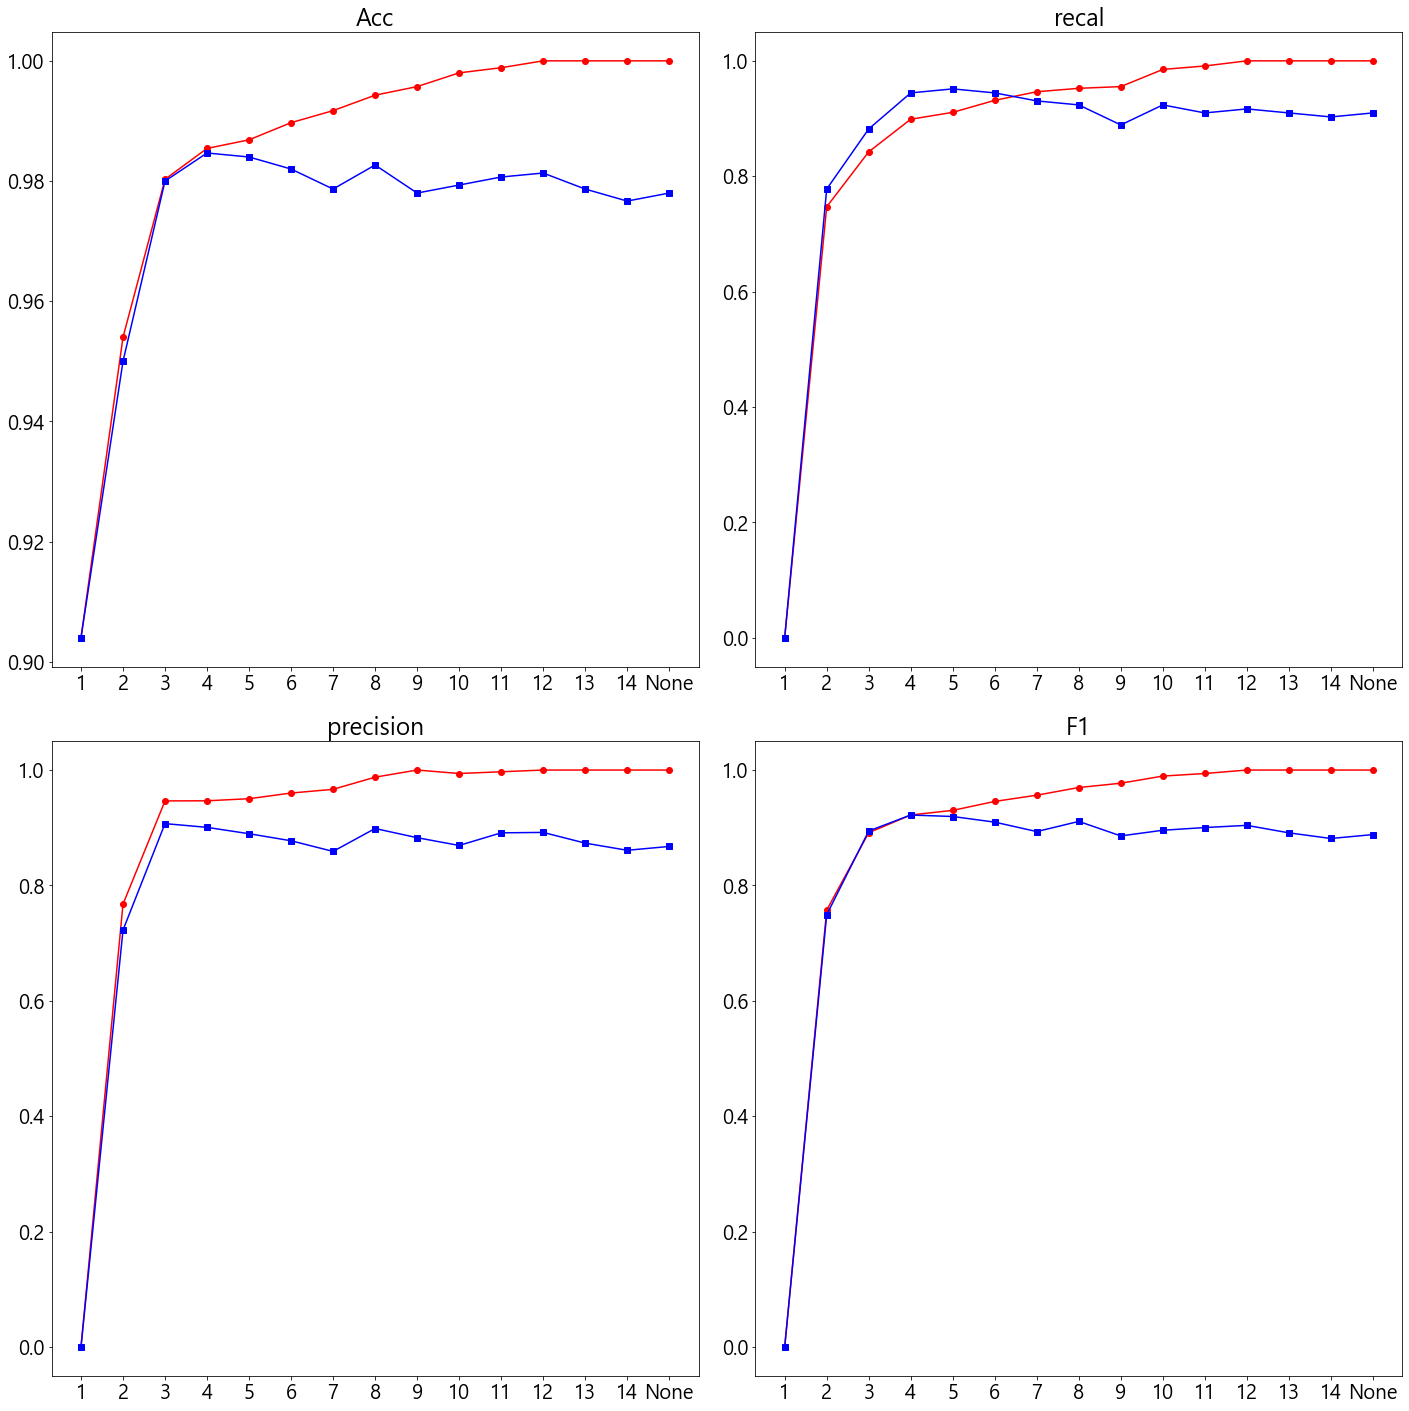

In [68]:
#범주간 불균형이 있는 상황에서 종속변수 Y에 중요변수가 있으므로 F1-measure가 중요지표
performance_measure=['Acc', 'recal','precision','F1','BCR']
train_list=[acc_train_list,recall_train_list,precision_train_list,F1_train_list,BCR_train_list]
test_list=[acc_test_list,recall_test_list,precision_test_list,F1_test_list,BCR_test_list]

fig = plt.figure(figsize=(20,20))
plt.rc('font', size=20)


for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    xticks = list(map(str, max_depths))
    
    ax.plot(range(len(max_depths)), train_list[i], color='red', marker='o')
#     ax.set_ylabel('train', color='red', fontsize=25)
    ax.plot(range(len(max_depths)), test_list[i], color='blue', marker='s')
#     ax2 = ax.twinx()
#     ax2.plot(range(len(max_depths)), test_list[i], color='blue', marker='s')
#     ax2.set_ylabel('test', color='blue', fontsize=25)
    
    plt.xticks(range(len(max_depths)), xticks)
    
    
    plt.title(performance_measure[i])
    
fig.tight_layout()
plt.show()

In [69]:
model = DecisionTreeClassifier(max_depth=4) # 나무 최대 깊이를 제한 가능 : 하이퍼파라미터로 조절 가능 None이면 풀트리
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [70]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

recall_train = recall_score(y_true = y_train, y_pred =y_train_pred)
recall_test = recall_score(y_true = y_test, y_pred =y_test_pred)
    
precision_train = precision_score(y_true = y_train, y_pred =y_train_pred)
precision_test = precision_score(y_true = y_test, y_pred =y_test_pred)
    
F1_train = 2 * (precision_train*recall_train)/(precision_train+recall_train)
F1_test = 2 * (precision_test*recall_test)/(precision_test+recall_test)

confusion_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

BCR_train = math.sqrt((confusion_matrix_train.loc[0,0]/(confusion_matrix_train.loc[0,1]+confusion_matrix_train.loc[0,0]))
                          *(confusion_matrix_train.loc[1,1]/(confusion_matrix_train.loc[1,0]+confusion_matrix_train.loc[0,0])))
BCR_test = math.sqrt((confusion_matrix_test.loc[0,0]/(confusion_matrix_test.loc[0,1]+confusion_matrix_test.loc[0,0]))
                          *(confusion_matrix_test.loc[1,1]/(confusion_matrix_test.loc[1,0]+confusion_matrix_test.loc[0,0])))

print('깊이가 5일때 최적')
print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))
print('Training BCR: {:.3f}'.format(acc_train))
print('Testing BCR: {:.3f}'.format(acc_test))
print('Training F1-measure: {:.3f}'.format(F1_train))
print('Testing F1-measure: {:.3f}'.format(F1_test))


깊이가 5일때 최적
Training Accuracy: 0.985
Testing Accuracy: 0.985
Training BCR: 0.985
Testing BCR: 0.985
Training F1-measure: 0.922
Testing F1-measure: 0.922


In [71]:
confusion_matrix_train

,0,1
0,3147,17
1,34,302


In [72]:
confusion_matrix_test

,0,1
0,1341,15
1,8,136


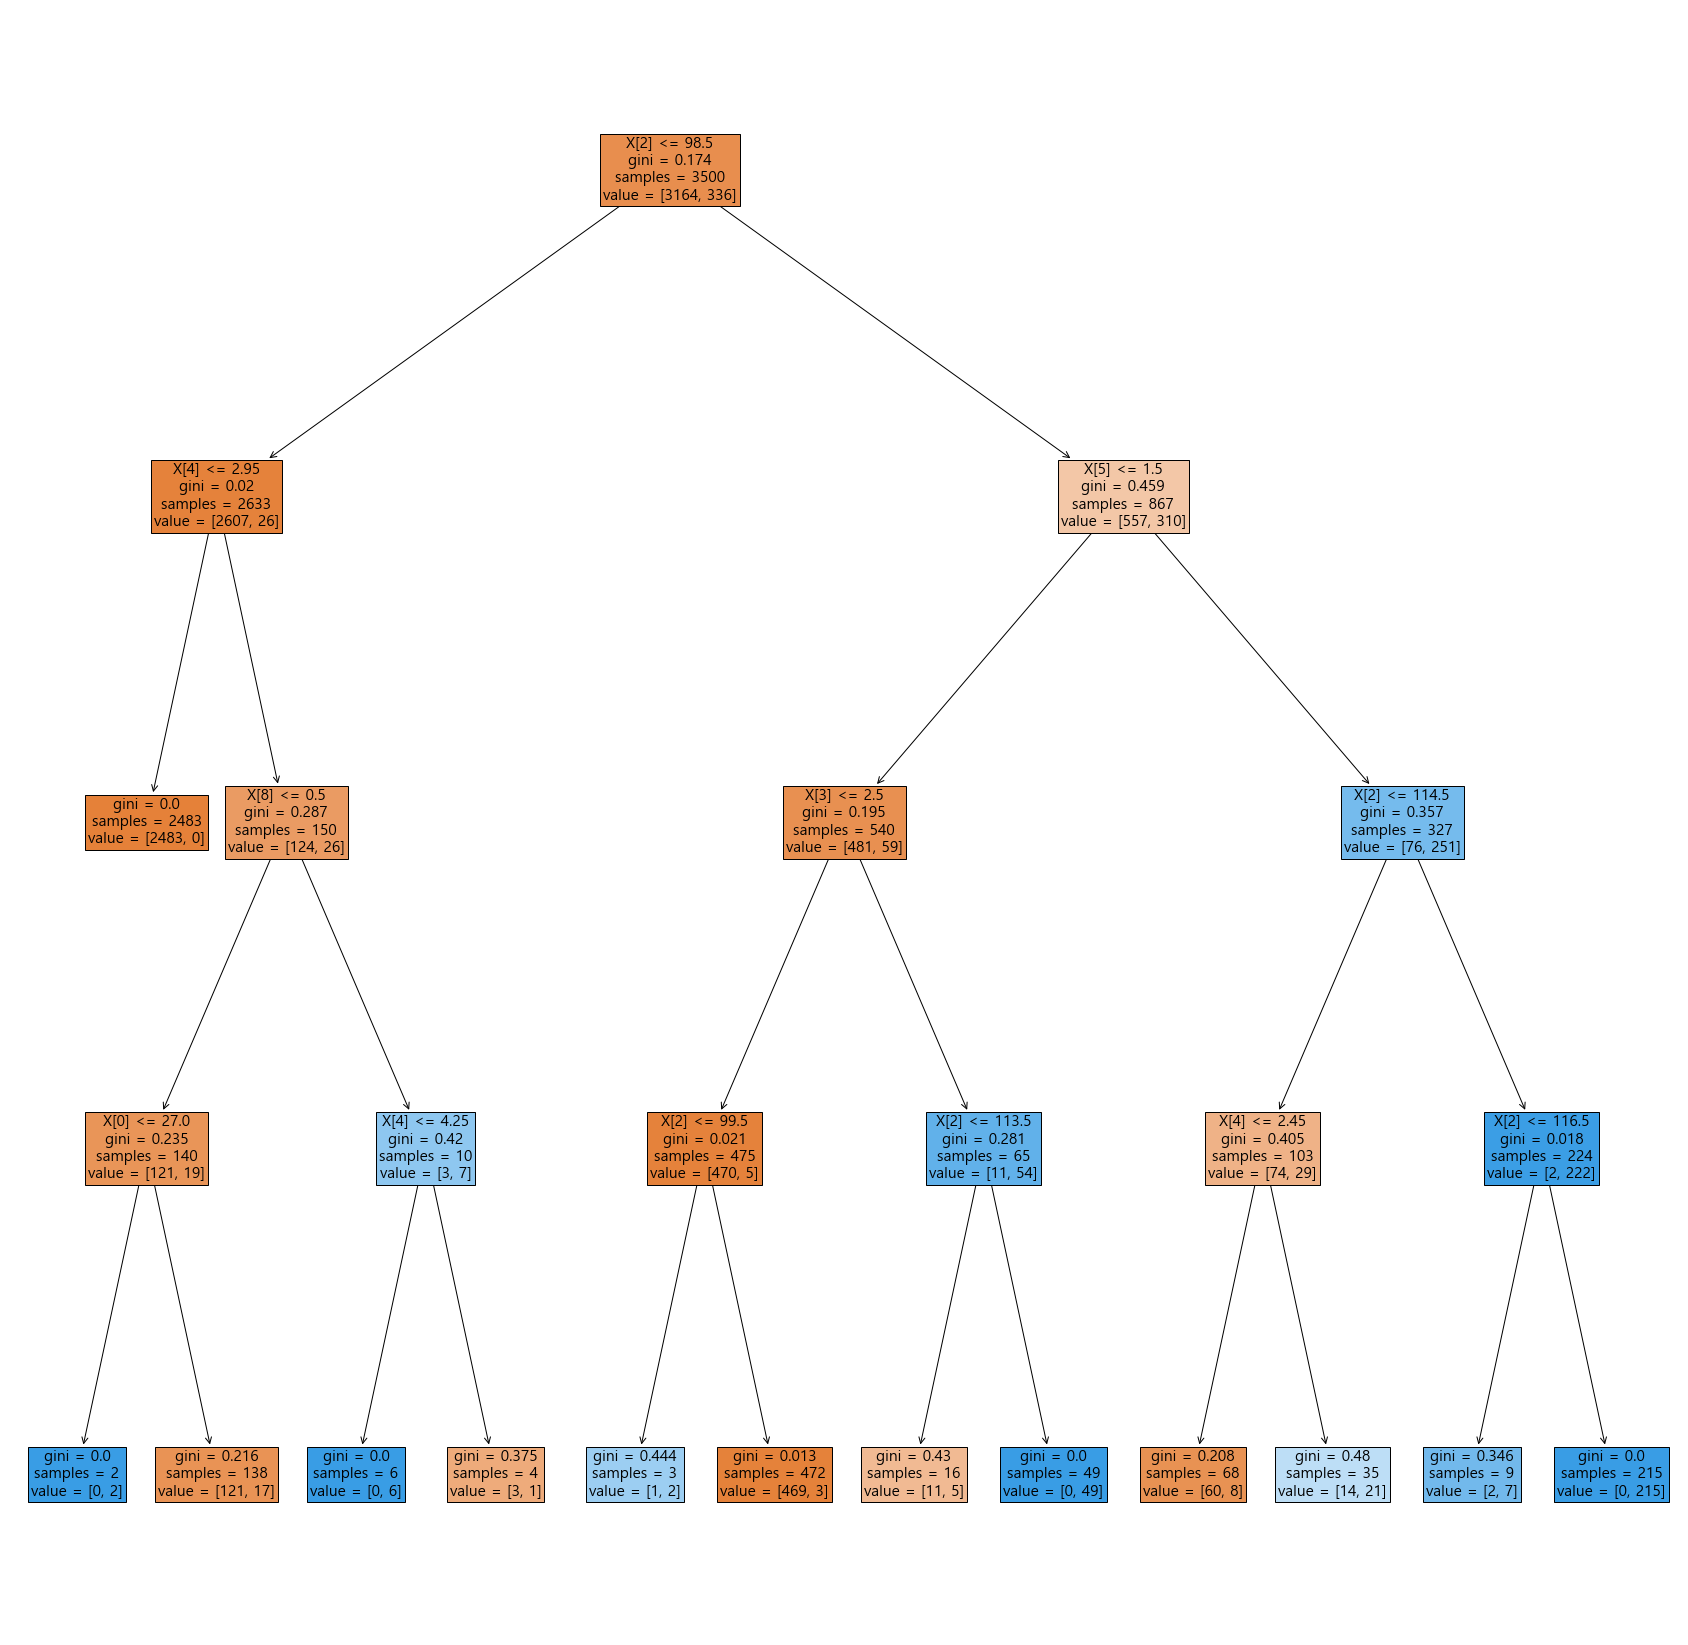

In [73]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(30,30))
plot_tree(decision_tree=model , filled=True) # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()